In [1]:
%run ./PPS_Expansion_Model.ipynb

In [2]:
# Distance points in cm (network coordinates)
s_distances = np.asarray([2700, 2200, 1500, 800, 300]) / 1000
s_distances_sec = np.linspace(s_distances[0], s_distances[-1], 15)
v = 30  # cm/s
a_distances = 100 - s_distances_sec * v  # distance points in cm (network coordinates)

ts = 0.4
simtime = 200

### Training parameters

In [3]:
stim_counts = 10
locav_x = 40

siga_x, sigv_x = 6.992e01, 2.889e00

HCWat, HCWvt, HCWav = cross_modal(at=0.05, sigat=2, vt=0.05, sigvt=2, av=0.05, sigav=2)
HCWt, HCWa, HCWv, HCBt, HCBa, HCBv = FwFb(
    Wt_0=6.5,
    Wa_0=6.5,
    Wv_0=6.5,
    Bt_0=2.5,
    Ba_0=2.5,
    Bv_0=2.5,
    k1=2.603e01,
    k2=7.795e02,
    lim=2.009e01,
    alpha=9.415e-01,
)

HCLt, HCLa, HCLv = Lw(
    Lex_t=0.15,
    Lin_t=0.05,
    sigmaex_t=1,
    sigmain_t=4,
    Lex_a=0.15,
    Lin_a=0.05,
    sigmaex_a=20,
    sigmain_a=80,
    Lex_v=0.15,
    Lin_v=0.05,
    sigmaex_v=1,
    sigmain_v=4,
)

## HC Training

In [4]:
rho_0 = 6.137e-02
k_a = 5e-05
k_v = 5e-05
theta_tr = 0.05

HCWa_tr, HCWv_tr, zm, zv, za, zt = FWTraining(
    n_steps=stim_counts,
    T=simtime,
    ts=ts,
    Lt=HCLt,
    La=HCLa,
    Lv=HCLv,
    Wt=HCWt,
    Wa=HCWa,
    Wv=HCWv,
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=0,
    rho_0=rho_0,
    Wmax_a=6.5,
    Wmax_v=6.5,
    k_a=k_a,
    k_v=k_v,
    theta=theta_tr,
    locav_x=locav_x,
    siga_x=siga_x,
    sigv_x=sigv_x,
)

Text(0.5, 1.0, 'HC')

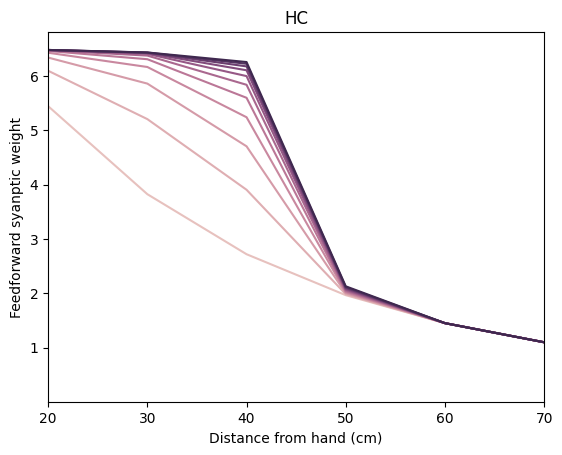

In [5]:
import seaborn as sns

hc_training_steps = np.column_stack((HCWa_tr[:, 1, :, 0], HCWa_tr[:, 1, -1, -1]))

sns.lineplot(
    hc_training_steps, palette="ch:dark=.20,light=.80", dashes=False, legend=False
)
plt.xlim(2, 7)
plt.xticks(ticks=[2, 3, 4, 5, 6, 7], labels=[20, 30, 40, 50, 60, 70])
plt.xlabel("Distance from hand (cm)")
plt.ylabel("Feedforward syanptic weight")
plt.title("HC")

In [6]:
##Post-Training
###Healthy Controls
ymin = 271.5
ymax = 326.5
fpostHCCP = 100 - 0.920 * v
fpostHCS = 1 / 0.085

HC_RTs_post = RTsig(a_distances, fpostHCCP, fpostHCS)

_, _, _, _, HC_Model_RTs_post = experiment(
    ts=ts,
    T=simtime,
    dist=a_distances,
    ya=5,
    Lt=HCLt,
    La=HCLa,
    Lv=HCLv,
    Wt=HCWt,
    Wa=HCWa_tr[:, :, -1, -1],
    Wv=HCWv_tr[:, :, -1, -1],
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=0,
    CMpr=0,
)

HC_RTs_model_post_scaled = fit_RT(HC_Model_RTs_post, HC_RTs_post)
ymin, ymax = np.min(HC_RTs_model_post_scaled), np.max(HC_RTs_model_post_scaled)
HC_CP_model_post, HC_SLOPE_model_post = fitting(a_distances, HC_RTs_model_post_scaled)

## SCZ Training

In [7]:
Lex, Pr = 7.887e-01, 4.773e-01
SCZLt, SCZLa, SCZLv = Lw(
    Lex_t=Lex,
    Lin_t=0.05,
    sigmaex_t=1,
    sigmain_t=4,
    Lex_a=Lex,
    Lin_a=0.05,
    sigmaex_a=20,
    sigmain_a=80,
    Lex_v=Lex,
    Lin_v=0.05,
    sigmaex_v=1,
    sigmain_v=4,
)

In [8]:
rho_0 = 6.137e-02
k_a = 5e-05
k_v = 5e-05
theta_tr = 0.05

SCZWa_tr, SCZWv_tr, _, _, _, _ = FWTraining(
    n_steps=stim_counts,
    T=simtime,
    ts=ts,
    Lt=SCZLt,
    La=SCZLa,
    Lv=SCZLv,
    Wt=HCWt,
    Wa=HCWa,
    Wv=HCWv,
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=Pr,
    rho_0=rho_0,
    Wmax_a=6.5,
    Wmax_v=6.5,
    k_a=k_a,
    k_v=k_v,
    theta=theta_tr,
    locav_x=locav_x,
    siga_x=siga_x,
    sigv_x=sigv_x,
)

Text(0.5, 1.0, 'SCZ - $L^{s}_{ex}$ - $\\rho_{{W}^{m}}$')

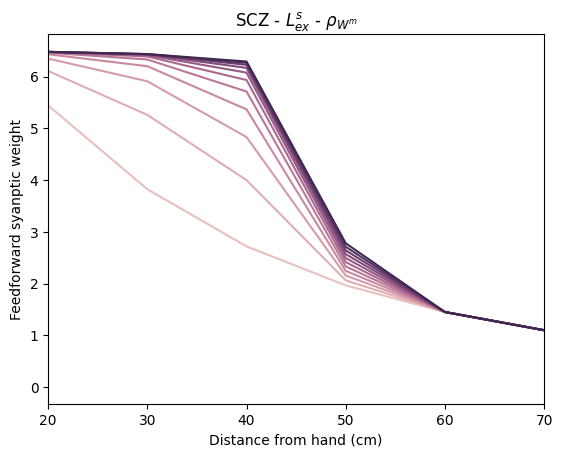

In [9]:
scz_training_steps = np.column_stack((SCZWa_tr[:, 1, :, 0], SCZWa_tr[:, 1, -1, -1]))

sns.lineplot(
    scz_training_steps, palette="ch:dark=.20,light=.80", dashes=False, legend=False
)
plt.xlim(2, 7)
plt.xticks(ticks=[2, 3, 4, 5, 6, 7], labels=[20, 30, 40, 50, 60, 70])
plt.xlabel("Distance from hand (cm)")
plt.ylabel("Feedforward syanptic weight")

plt.title("SCZ - " + r"$L^{s}_{ex}$ - " + r"$\rho_{{W}^{m}}$")

In [10]:
##Post-Training
###SCZ
ymin = 373.0
ymax = 455.0
scz_cp_post = 100 - 1.176 * v
scz_slope_post = 1 / 0.0615

SCZ_RTs_post = RTsig(a_distances, scz_cp_post, scz_slope_post)

_, _, _, _, SCZ_Model_RTs_post = experiment(
    ts=ts,
    T=simtime,
    dist=a_distances,
    ya=5,
    Lt=SCZLt,
    La=SCZLa,
    Lv=SCZLv,
    Wt=HCWt,
    Wa=SCZWa_tr[:, :, -1, -1],
    Wv=SCZWv_tr[:, :, -1, -1],
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=0,
    CMpr=0,
)

SCZ_RTs_model_post_scaled = fit_RT(SCZ_Model_RTs_post, SCZ_RTs_post)
ymin, ymax = np.min(SCZ_RTs_model_post_scaled), np.max(SCZ_RTs_model_post_scaled)
SCZ_CP_model_post, SCZ_SLOPE_model_post = fitting(
    a_distances, SCZ_RTs_model_post_scaled
)

## SCZ Training - Reduced learning rate

In [11]:
rho_0 = 1.435e-02
k_a = 5e-05
k_v = 5e-05
theta_tr = 0.05

SCZWa_tr_rho, SCZWv_tr_rho, _, _, _, _ = FWTraining(
    n_steps=stim_counts,
    T=simtime,
    ts=ts,
    Lt=SCZLt,
    La=SCZLa,
    Lv=SCZLv,
    Wt=HCWt,
    Wa=HCWa,
    Wv=HCWv,
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=Pr,
    rho_0=rho_0,
    Wmax_a=6.5,
    Wmax_v=6.5,
    k_a=k_a,
    k_v=k_v,
    theta=theta_tr,
    locav_x=locav_x,
    siga_x=siga_x,
    sigv_x=sigv_x,
)

Text(0.5, 1.0, 'SCZ - $L^{s}_{ex}$ - $\\rho_{{W}^{m}}$ - $\\rho^{s}_{0}$')

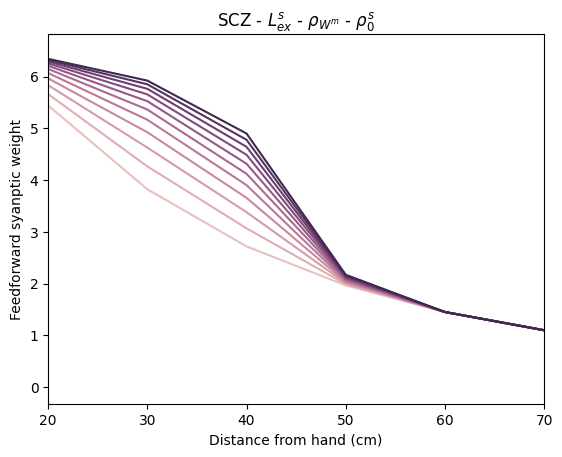

In [12]:
scz_training_steps_rho = np.column_stack(
    (SCZWa_tr_rho[:, 1, :, 0], SCZWa_tr_rho[:, 1, -1, -1])
)

sns.lineplot(
    scz_training_steps_rho, palette="ch:dark=.20,light=.80", dashes=False, legend=False
)
plt.xlim(2, 7)
plt.xticks(ticks=[2, 3, 4, 5, 6, 7], labels=[20, 30, 40, 50, 60, 70])
plt.xlabel("Distance from hand (cm)")
plt.ylabel("Feedforward syanptic weight")
plt.title("SCZ - " + r"$L^{s}_{ex}$ - " + r"$\rho_{{W}^{m}}$ - " + r"$\rho^{s}_{0}$")

In [13]:
_, _, _, _, SCZ_Model_RTs_post_rho = experiment(
    ts=ts,
    T=simtime,
    dist=a_distances,
    ya=5,
    Lt=SCZLt,
    La=SCZLa,
    Lv=SCZLv,
    Wt=HCWt,
    Wa=SCZWa_tr_rho[:, :, -1, -1],
    Wv=SCZWv_tr_rho[:, :, -1, -1],
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=0,
    CMpr=0,
)

SCZ_RTs_model_post_scaled_rho = fit_RT(SCZ_Model_RTs_post_rho, SCZ_RTs_post)
ymin, ymax = np.min(SCZ_RTs_model_post_scaled_rho), np.max(
    SCZ_RTs_model_post_scaled_rho
)
SCZ_CP_model_post_rho, SCZ_SLOPE_model_post_rho = fitting(
    a_distances, SCZ_RTs_model_post_scaled_rho
)

## SCZ Training - Forgetting rate

In [14]:
rho_0 = 6.137e-02
k_a = 1.247e-03
k_v = 1.247e-03
theta_tr = 0.05

SCZWa_tr_kappa, SCZWv_tr_kappa, _, _, _, _ = FWTraining(
    n_steps=stim_counts,
    T=simtime,
    ts=ts,
    Lt=SCZLt,
    La=SCZLa,
    Lv=SCZLv,
    Wt=HCWt,
    Wa=HCWa,
    Wv=HCWv,
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=Pr,
    rho_0=rho_0,
    Wmax_a=6.5,
    Wmax_v=6.5,
    k_a=k_a,
    k_v=k_v,
    theta=theta_tr,
    locav_x=locav_x,
    siga_x=siga_x,
    sigv_x=sigv_x,
)

Text(0.5, 1.0, 'SCZ - $L^{s}_{ex}$ - $\\rho_{{W}^{sm}}$ - $\\kappa^{s}$')

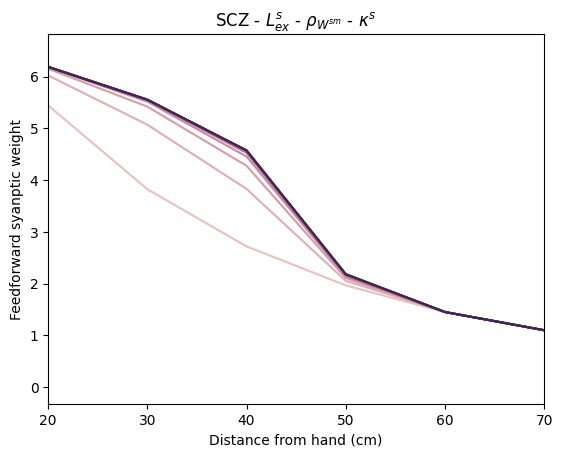

In [15]:
scz_training_steps_kappa = np.column_stack(
    (SCZWa_tr_kappa[:, 1, :, 0], SCZWa_tr_kappa[:, 1, -1, -1])
)

sns.lineplot(
    scz_training_steps_kappa,
    palette="ch:dark=.20,light=.80",
    dashes=False,
    legend=False,
)
plt.xlim(2, 7)
plt.xticks(ticks=[2, 3, 4, 5, 6, 7], labels=[20, 30, 40, 50, 60, 70])
plt.xlabel("Distance from hand (cm)")
plt.ylabel("Feedforward syanptic weight")
plt.title("SCZ - " + r"$L^{s}_{ex}$ - " + r"$\rho_{{W}^{sm}}$ - " + r"$\kappa^{s}$")

In [16]:
_, _, _, _, SCZ_Model_RTs_post_kappa = experiment(
    ts=ts,
    T=simtime,
    dist=a_distances,
    ya=5,
    Lt=SCZLt,
    La=SCZLa,
    Lv=SCZLv,
    Wt=HCWt,
    Wa=SCZWa_tr_kappa[:, :, -1, -1],
    Wv=SCZWv_tr_kappa[:, :, -1, -1],
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=0,
    CMpr=0,
)

SCZ_RTs_model_post_scaled_kappa = fit_RT(SCZ_Model_RTs_post_kappa, SCZ_RTs_post)
ymin, ymax = np.min(SCZ_RTs_model_post_scaled_kappa), np.max(
    SCZ_RTs_model_post_scaled_kappa
)
SCZ_CP_model_post_kappa, SCZ_SLOPE_model_post_kappa = fitting(
    a_distances, SCZ_RTs_model_post_scaled_kappa
)

## SCZ Training - Plasticity threshold

In [17]:
rho_0 = 6.137e-02
k_a = 5e-05
k_v = 5e-05
theta_tr = 8.019e-01

SCZWa_tr_theta, SCZWv_tr_theta, _, _, _, _ = FWTraining(
    n_steps=stim_counts,
    T=simtime,
    ts=ts,
    Lt=SCZLt,
    La=SCZLa,
    Lv=SCZLv,
    Wt=HCWt,
    Wa=HCWa,
    Wv=HCWv,
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=Pr,
    rho_0=rho_0,
    Wmax_a=6.5,
    Wmax_v=6.5,
    k_a=k_a,
    k_v=k_v,
    theta=theta_tr,
    locav_x=locav_x,
    siga_x=siga_x,
    sigv_x=sigv_x,
)

Text(0.5, 1.0, 'SCZ - $L^{s}_{ex}$ - $\\rho_{{W}^{m}}$ - $\\theta$')

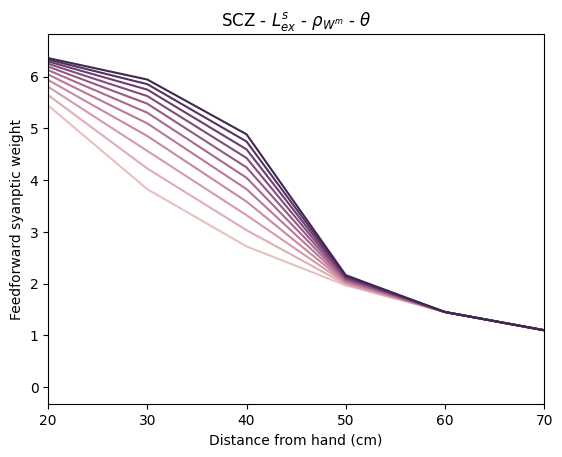

In [18]:
scz_training_steps_theta = np.column_stack(
    (SCZWa_tr_theta[:, 1, :, 0], SCZWa_tr_theta[:, 1, -1, -1])
)

sns.lineplot(
    scz_training_steps_theta,
    palette="ch:dark=.20,light=.80",
    dashes=False,
    legend=False,
)
plt.xlim(2, 7)
plt.xticks(ticks=[2, 3, 4, 5, 6, 7], labels=[20, 30, 40, 50, 60, 70])
plt.xlabel("Distance from hand (cm)")
plt.ylabel("Feedforward syanptic weight")
plt.title("SCZ - " + r"$L^{s}_{ex}$ - " + r"$\rho_{{W}^{m}}$ - " + r"$\theta$")

In [19]:
_, _, _, _, SCZ_Model_RTs_post_theta = experiment(
    ts=ts,
    T=simtime,
    dist=a_distances,
    ya=5,
    Lt=SCZLt,
    La=SCZLa,
    Lv=SCZLv,
    Wt=HCWt,
    Wa=SCZWa_tr_theta[:, :, -1, -1],
    Wv=SCZWv_tr_theta[:, :, -1, -1],
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=0,
    CMpr=0,
)

SCZ_RTs_model_post_scaled_theta = fit_RT(SCZ_Model_RTs_post_theta, SCZ_RTs_post)
ymin, ymax = np.min(SCZ_RTs_model_post_scaled_theta), np.max(
    SCZ_RTs_model_post_scaled_theta
)
SCZ_CP_model_post_theta, SCZ_SLOPE_model_post_theta = fitting(
    a_distances, SCZ_RTs_model_post_scaled_theta
)

## Figure 5

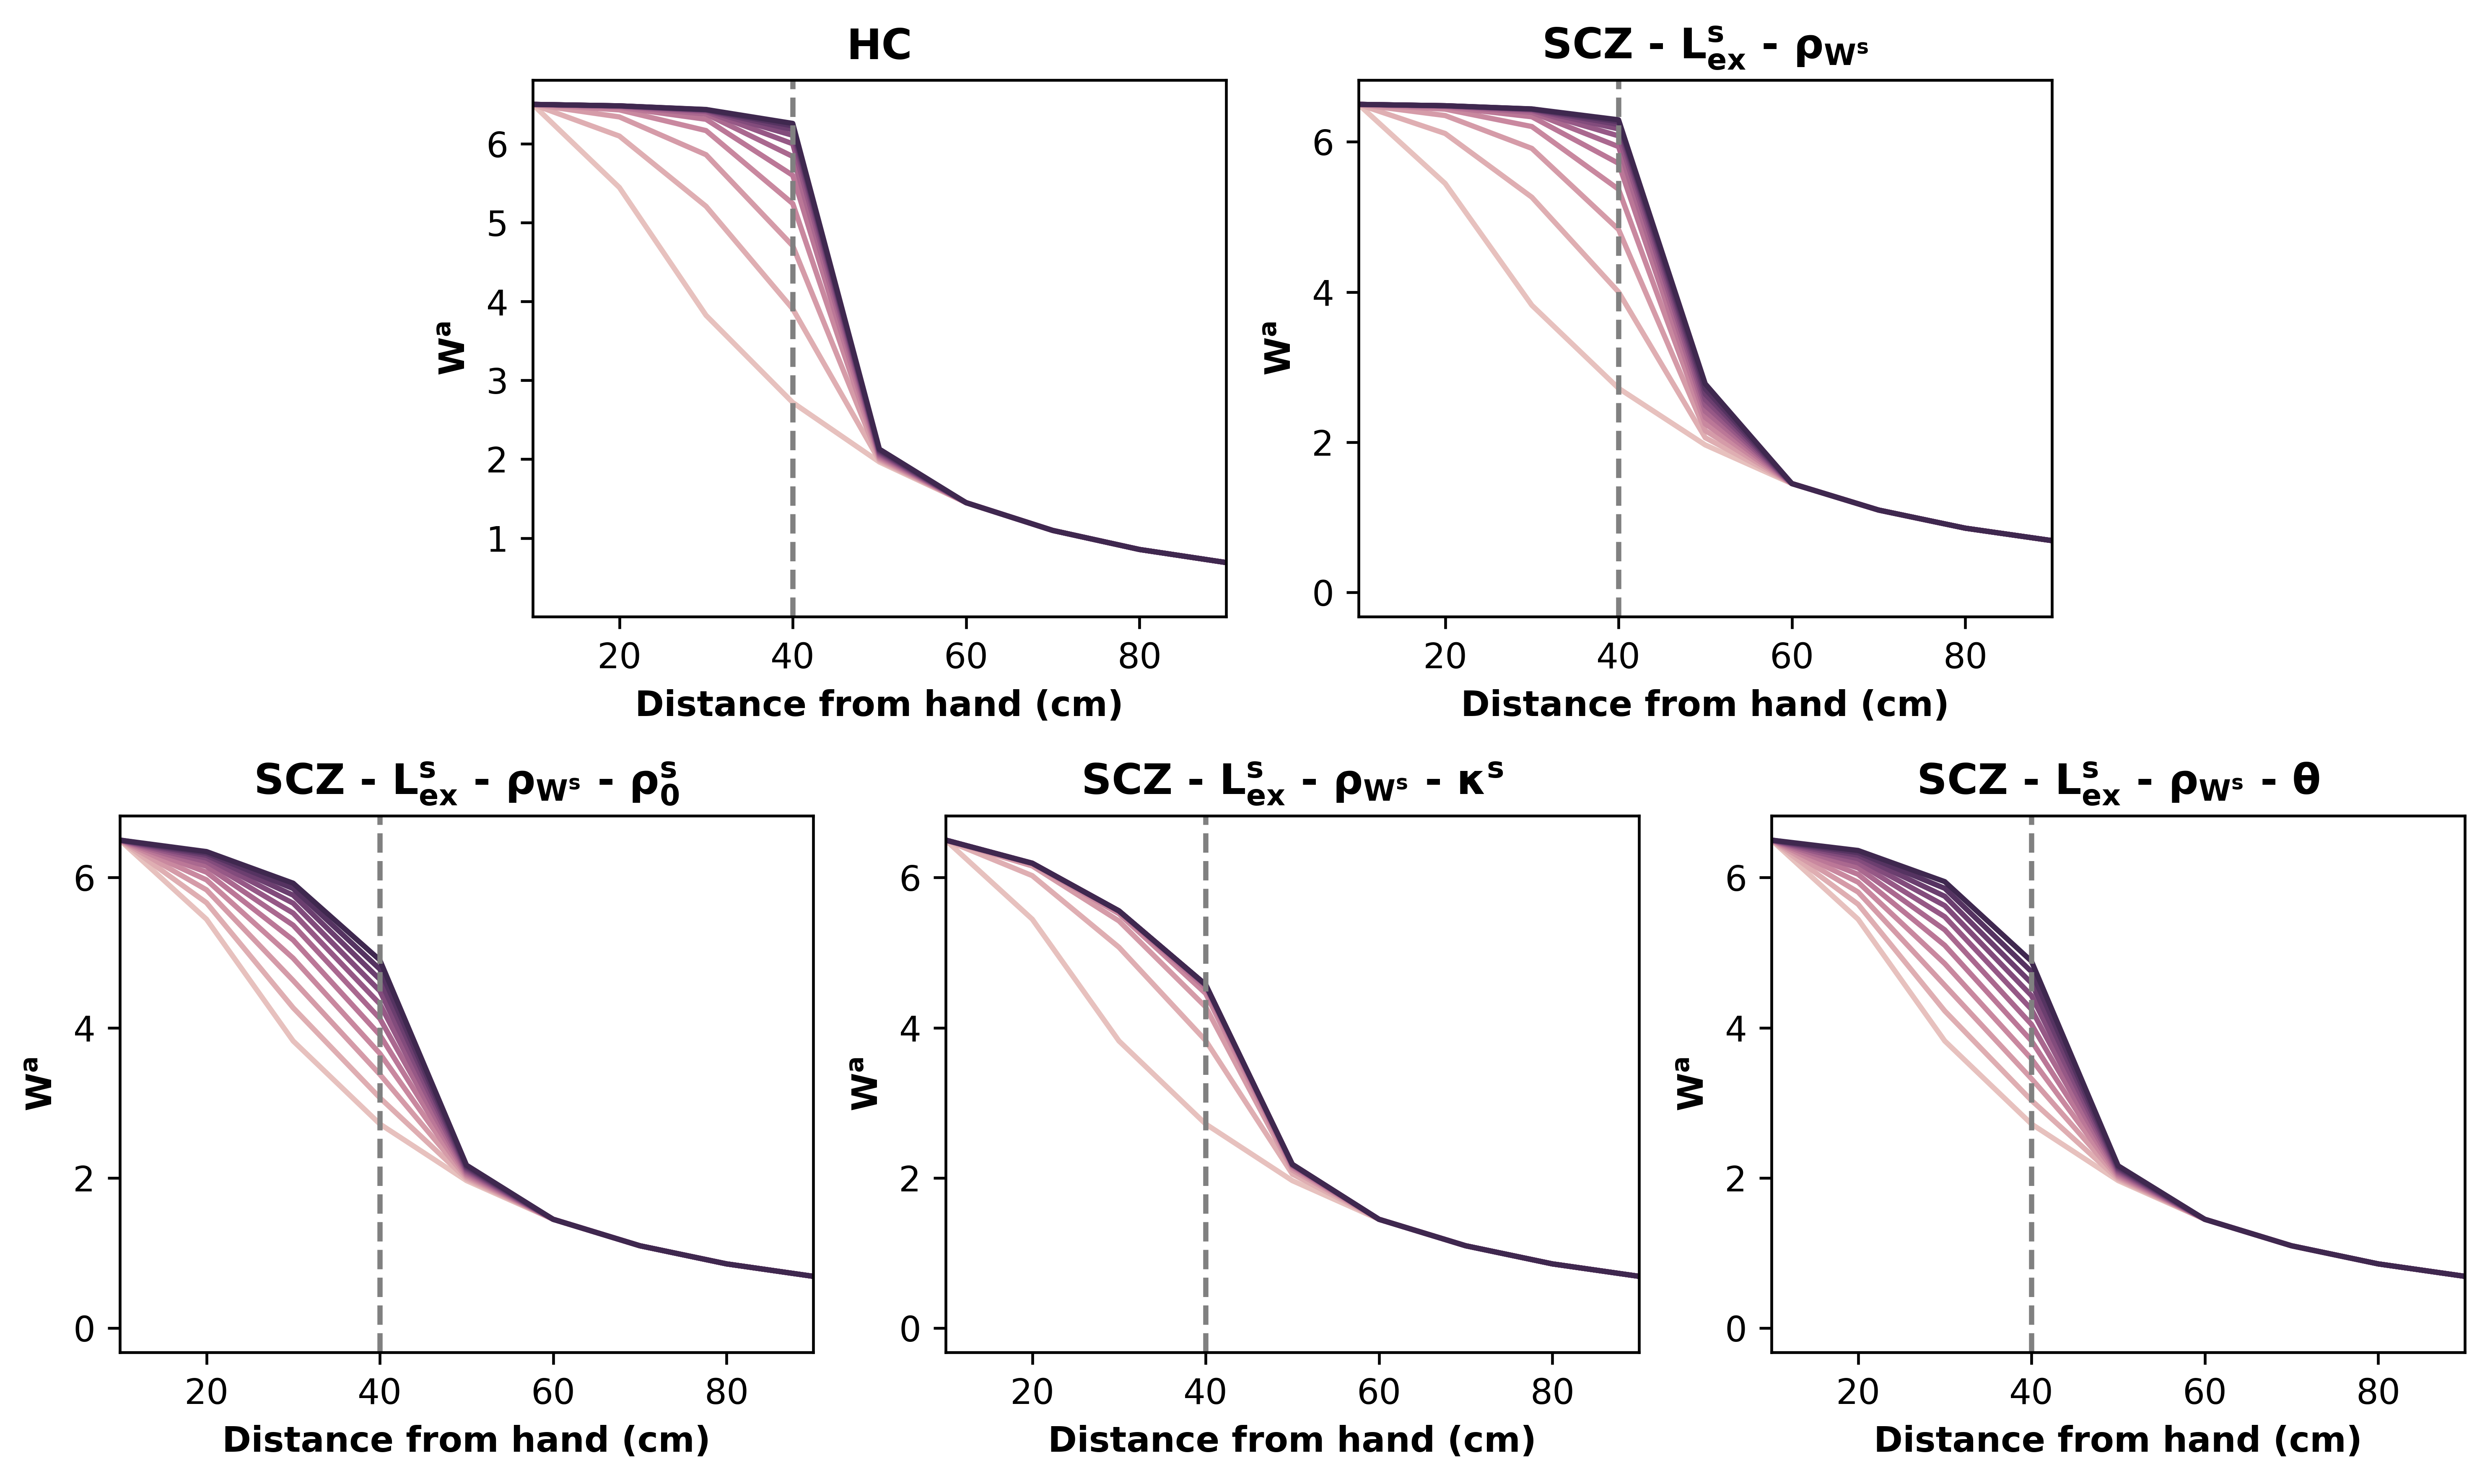

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure
fig = plt.figure(figsize=(10, 6), dpi=600)

# 1. Create the 2-row, 6-column GridSpec
gs = fig.add_gridspec(2, 6)

# 2. Add subplots for the top row (centered)
# We use columns 1-2 and 3-4, leaving 0 and 5 empty
ax1 = fig.add_subplot(gs[0, 1:3])
sns.lineplot(
    hc_training_steps,
    palette="ch:dark=.20,light=.80",
    dashes=False,
    legend=False,
    ax=ax1,
)
ax1.set_title("HC", fontweight="bold")

ax2 = fig.add_subplot(gs[0, 3:5])
sns.lineplot(
    scz_training_steps,
    palette="ch:dark=.20,light=.80",
    dashes=False,
    legend=False,
    ax=ax2,
)
ax2.set_title(
    "SCZ - " + r"$\mathbf{L^{s}_{ex}}$ - " + r"$\mathbf{\rho_{{W}^{s}}}$",
    fontweight="bold",
)

# 3. Add subplots for the bottom row
# These fill all 6 columns
ax3 = fig.add_subplot(gs[1, 0:2])
sns.lineplot(
    scz_training_steps_rho,
    palette="ch:dark=.20,light=.80",
    dashes=False,
    legend=False,
    ax=ax3,
)
ax3.set_title(
    "SCZ - "
    + r"$\mathbf{L^{s}_{ex}}$ - "
    + r"$\mathbf{\rho_{{W}^{s}}}$ - "
    + r"$\mathbf{\rho^{s}_{0}}$",
    fontweight="bold",
)

ax4 = fig.add_subplot(gs[1, 2:4])
sns.lineplot(
    scz_training_steps_kappa,
    palette="ch:dark=.20,light=.80",
    dashes=False,
    legend=False,
    ax=ax4,
)
ax4.set_title(
    "SCZ - "
    + r"$\mathbf{L^{s}_{ex}}$ - "
    + r"$\mathbf{\rho_{{W}^{s}}}$ - "
    + r"$\mathbf{\kappa^{s}}$",
    fontweight="bold",
)

ax5 = fig.add_subplot(gs[1, 4:6])
sns.lineplot(
    scz_training_steps_theta,
    palette="ch:dark=.20,light=.80",
    dashes=False,
    legend=False,
    ax=ax5,
)
ax5.set_title(
    "SCZ - "
    + r"$\mathbf{L^{s}_{ex}}$ - "
    + r"$\mathbf{\rho_{{W}^{s}}}$ - "
    + r"$\mathbf{\theta}$",
    fontweight="bold",
)

for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.set_xlim(1, 9)
    ax.set_xticks(ticks=[2, 4, 6, 8], labels=[20, 40, 60, 80])
    ax.set_xlabel("Distance from hand (cm)", fontweight="bold")
    ax.set_ylabel(r"$\mathbf{W^{a}}$", fontweight="bold")
    ax.axvline(x=locav_x * 0.1, color="gray", linestyle="--")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

fig.savefig("drafts/supFIG3.png", bbox_inches="tight", format="png")

In [21]:
HC_CP_model_pre = 55.000000006613384
HC_SLOPE_model_pre = 0.07970646020751201

SCZ_CP_model_pre = 53.605818
SCZ_SLOPE_model_pre = 0.084232


cols = ["Model", "Training", "Central Point (cm)", "Slope"]
sim_data = np.array(
    [
        ["HC Model", "Pre", HC_CP_model_pre, HC_SLOPE_model_pre],
        ["HC Model", "Post", HC_CP_model_post, 1 / HC_SLOPE_model_post],
        [
            "SCZ - L_ex - rho_W",
            "Pre",
            SCZ_CP_model_pre,
            SCZ_SLOPE_model_pre,
        ],
        [
            "SCZ - L_ex - rho_W",
            "Post",
            SCZ_CP_model_post,
            1 / SCZ_SLOPE_model_post,
        ],
        ["SCZ - L_ex - rho_W - rho", "Pre", SCZ_CP_model_pre, SCZ_SLOPE_model_pre],
        [
            "SCZ - L_ex - rho_W - rho",
            "Post",
            SCZ_CP_model_post_rho,
            1 / SCZ_SLOPE_model_post_rho,
        ],
        ["SCZ - L_ex - rho_W - kappa", "Pre", SCZ_CP_model_pre, SCZ_SLOPE_model_pre],
        [
            "SCZ - L_ex - rho_W - kappa",
            "Post",
            SCZ_CP_model_post_kappa,
            1 / SCZ_SLOPE_model_post_kappa,
        ],
        ["SCZ - L_ex - rho_W - theta", "Pre", SCZ_CP_model_pre, SCZ_SLOPE_model_pre],
        [
            "SCZ - L_ex - rho_W - theta",
            "Post",
            SCZ_CP_model_post_theta,
            1 / SCZ_SLOPE_model_post_theta,
        ],
    ]
)
sim_df = pd.DataFrame(sim_data, columns=cols)
sim_df[["Central Point (cm)", "Slope"]] = sim_df[
    ["Central Point (cm)", "Slope"]
].astype(float)
sim_df

,Model,Training,Central Point (cm),Slope
0,HC Model,Pre,55.000000,0.079706
1,HC Model,Post,59.465839,0.112644
2,SCZ - L_ex - rho_W,Pre,53.605818,0.084232
3,SCZ - L_ex - rho_W,Post,59.075711,0.114129
4,SCZ - L_ex - rho_W - rho,Pre,53.605818,0.084232
5,SCZ - L_ex - rho_W - rho,Post,57.298661,0.102657
6,SCZ - L_ex - rho_W - kappa,Pre,53.605818,0.084232
7,SCZ - L_ex - rho_W - kappa,Post,56.690587,0.095514
8,SCZ - L_ex - rho_W - theta,Pre,53.605818,0.084232
9,SCZ - L_ex - rho_W - theta,Post,57.298661,0.102657


In [22]:
df_pivoted = sim_df.pivot(
    index="Model", columns="Training", values=["Central Point (cm)", "Slope"]
)

delta_sim_df = pd.DataFrame()
delta_sim_df["Delta CP"] = (
    df_pivoted[("Central Point (cm)", "Post")]
    - df_pivoted[("Central Point (cm)", "Pre")]
)
delta_sim_df["Delta Slope"] = (
    df_pivoted[("Slope", "Post")] - df_pivoted[("Slope", "Pre")]
)

delta_sim_df = delta_sim_df.reset_index()
delta_sim_df.round(3)

,Model,Delta CP,Delta Slope
0,HC Model,4.466,0.033
1,SCZ - L_ex - rho_W,5.470,0.030
2,SCZ - L_ex - rho_W - kappa,3.085,0.011
3,SCZ - L_ex - rho_W - rho,3.693,0.018
4,SCZ - L_ex - rho_W - theta,3.693,0.018
